In [1]:
import numpy as np 
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline 

from sklearn.cluster import KMeans 
from sklearn.datasets import load_iris

import seaborn as sns 
import matplotlib.pyplot as plt 

# iris Clustring 

In [2]:
data = load_iris()
print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
X = data ["data"]
y =  data["target"]

In [4]:
X.shape , y.shape 

((150, 4), (150,))

In [5]:
X_2d= PCA(n_components=2).fit_transform(X)

In [6]:
cls = KMeans(n_clusters= 3 )
cls.fit(X_2d)

KMeans(n_clusters=3)

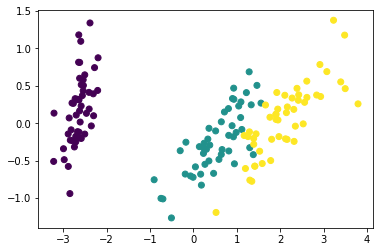

In [7]:
plt.scatter (X_2d[:,0],X_2d[:,1],c= y )

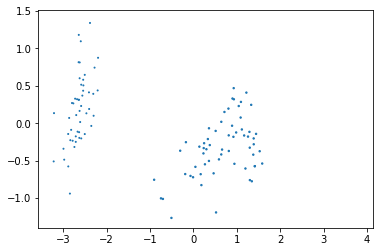

In [8]:
plt.scatter (X_2d[:,0],X_2d[:,1],cls.predict(X_2d))

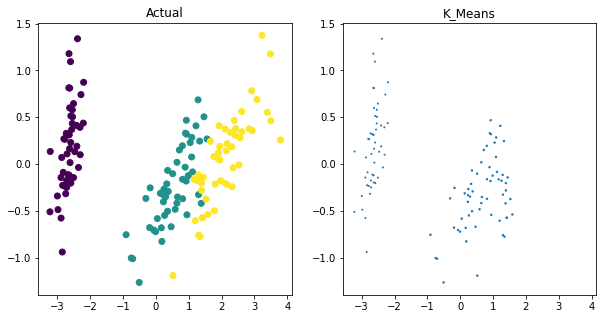

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("Actual")
plt.scatter (X_2d[:,0],X_2d[:,1],c= y )
plt.subplot(122)
plt.title("K_Means")
plt.scatter (X_2d[:,0],X_2d[:,1],cls.predict(X_2d) )

In [10]:
from sklearn.metrics import calinski_harabasz_score

In [11]:
inertia =[]
calinski=[]
K=[]
for k in range (2,16):
    cls=KMeans(n_clusters=k).fit(X)
    K.append(k)
    inertia.append (cls.inertia_)
    calinski.append(calinski_harabasz_score(X,cls.predict(X)))
    print(k)

2
3
4
5
6
7
8
9
10
11
12
13
14
15


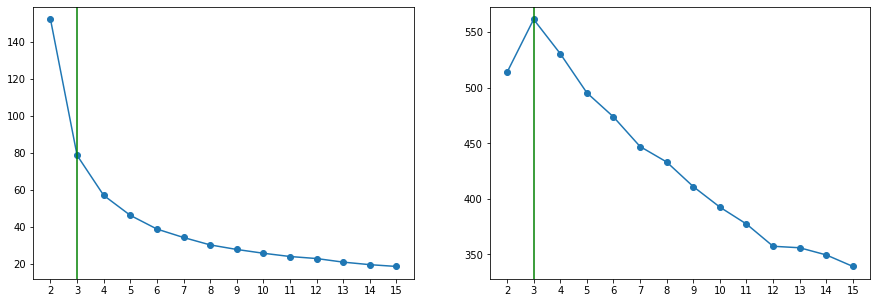

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(K,inertia,"-o")
plt.xticks(K)
plt.axvline(3,color="green")

plt.subplot(122)
plt.plot(K,calinski,"-o")
plt.xticks(K)
plt.axvline(3,color="green")

In [13]:
mall_data= pd.read_csv("../DATA/Mall_Customers.csv")

In [14]:
mall_data = mall_data.drop(columns=["CustomerID"])


In [15]:
mall_data = mall_data.rename(columns={"Annual Income (k$)":"inscome","Spending Score (1-100)":"score"})

In [16]:
mall_data

,Gender,Age,inscome,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


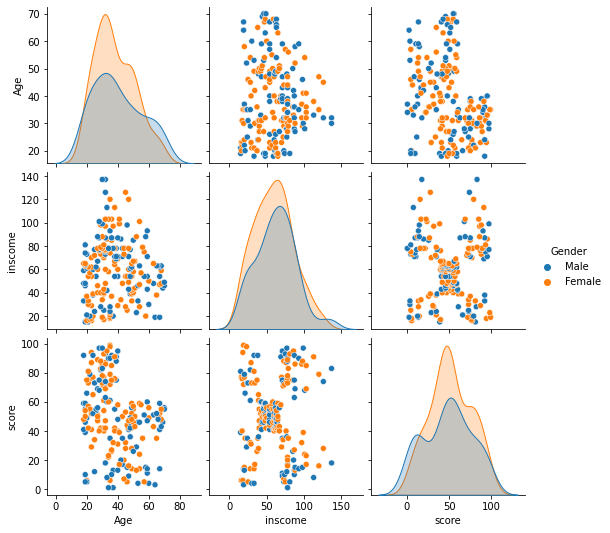

In [17]:
sns.pairplot(mall_data,hue="Gender")

In [18]:
X_mall = mall_data.copy()


In [19]:
pd.get_dummies(X_mall["Gender"])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [20]:
X_mall["Female"]= pd.get_dummies(X_mall["Gender"])["Female"]
X_mall["Male"]= pd.get_dummies(X_mall["Gender"])["Male"]
X_mall = X_mall.drop(columns=['Gender'])

In [21]:
X_mall

,Age,inscome,score,Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [22]:
inertia =[]
calinski=[]
K=[]
for k in range (2,16):
    cls=KMeans(n_clusters=k).fit(X_mall)
    K.append(k)
    inertia.append (cls.inertia_)
    calinski.append(calinski_harabasz_score(X_mall,cls.predict(X_mall)))
    print(k)

2
3
4
5
6
7
8
9
10
11
12
13
14
15


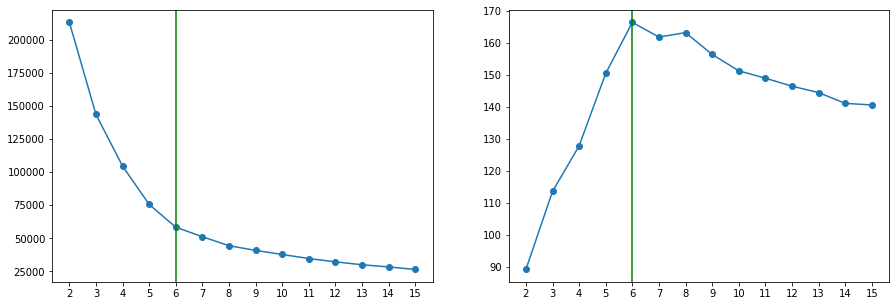

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(K,inertia,"-o")
plt.xticks(K)
plt.axvline(6,color="green")
plt.subplot(122)

plt.plot(K,calinski,"-o")
plt.xticks(K)
plt.axvline(6,color="green")

<AxesSubplot:xlabel='score', ylabel='inscome'>

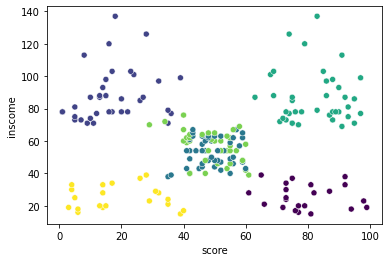

In [25]:
cls = KMeans(n_clusters=6).fit(X_mall)
sns.scatterplot(data=mall_data,x="score",y="inscome" ,c = cls.predict(X_mall))

<AxesSubplot:xlabel='score', ylabel='inscome'>

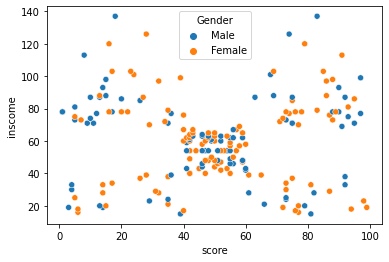

In [26]:
sns.scatterplot(data=mall_data,x="score",y="inscome" ,hue="Gender")

# meanshift

In [29]:
from sklearn.cluster import MeanShift

5


<AxesSubplot:xlabel='score', ylabel='inscome'>

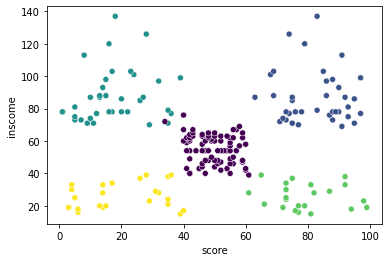

In [41]:
cls = MeanShift (bandwidth=22).fit(X_mall)
print (len(np.unique(cls.labels_)))
sns.scatterplot(data=mall_data,x="score",y="inscome" ,c = cls.predict(X_mall))

# DB_SCAN


In [42]:
from sklearn.cluster import DBSCAN

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0 -1  0]


<AxesSubplot:xlabel='score', ylabel='inscome'>

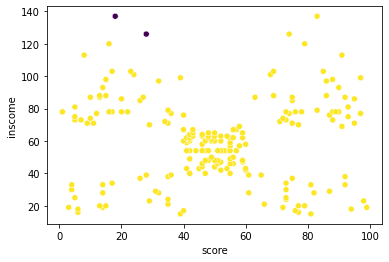

In [54]:
labels = DBSCAN (eps= 21,min_samples=6).fit_predict(X_mall)
print (labels)
sns.scatterplot(data=mall_data,x="score",y="inscome" ,c = labels) 